# Benchmark Results Visualization

This notebook loads the benchmark results from `benchmark_results.csv` and plots the average transcription times using matplotlib.

              model  beam_size  average_time                     Label   Color
0         tiny-int8          2      2.206636        tiny-int8 (beam=2)    blue
1         tiny-int8          5      2.078299        tiny-int8 (beam=5)    blue
2              tiny          2      2.508185             tiny (beam=2)  orange
3              tiny          5      2.643614             tiny (beam=5)  orange
4           tiny.en          2      1.419228          tiny.en (beam=2)    blue
5           tiny.en          5      1.672263          tiny.en (beam=5)    blue
6         base-int8          2      4.016866        base-int8 (beam=2)  orange
7         base-int8          5      4.255608        base-int8 (beam=5)  orange
8              base          2      5.498789             base (beam=2)    blue
9              base          5      5.696492             base (beam=5)    blue
10          base.en          2      2.955957          base.en (beam=2)  orange
11          base.en          5      3.199096        

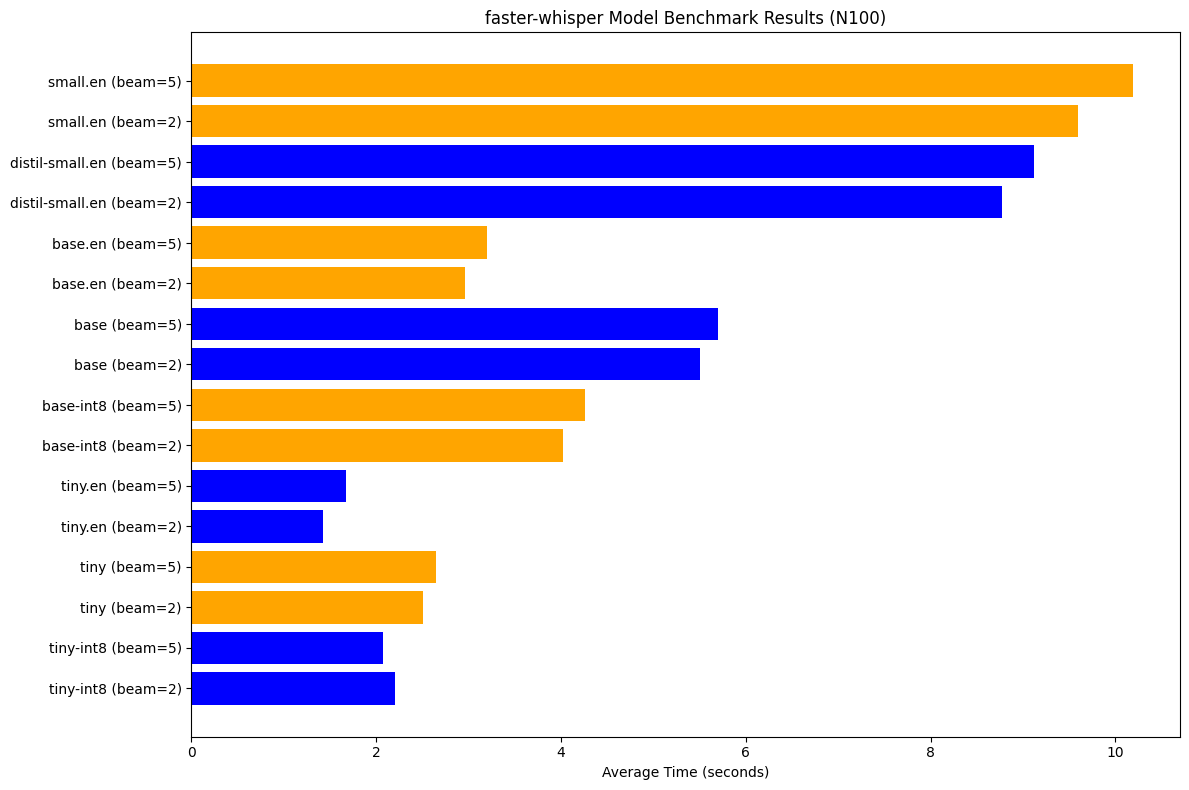

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the benchmark results CSV
# df = pd.read_csv('benchmark_results_i7.csv')
# df = pd.read_csv('benchmark_results_beam_width.csv')
df = pd.read_csv('benchmark_results_N100.csv')

# Create a label that combines model name and beam size
df['Label'] = df.apply(lambda row: f"{row['model']} (beam={row['beam_size']})", axis=1)

# Get unique models preserving the order of appearance
models = df['model'].unique()

# Define alternating colors (extend list if you prefer more colors)
colors = ['blue', 'orange']
color_mapping = {model: colors[i % len(colors)] for i, model in enumerate(models)}

# Map each row's model to its color
df['Color'] = df['model'].apply(lambda x: color_mapping[x])

print(df)

# Create a horizontal bar chart with each bar colored by model
plt.figure(figsize=(12, 8))
plt.barh(df['Label'], df['average_time'], color=df['Color'])
plt.xlabel('Average Time (seconds)')
plt.title('faster-whisper Model Benchmark Results (N100)')
plt.tight_layout()

# Save the plot to a file
plt.savefig('benchmark_results.png')
plt.show()